<a href="https://colab.research.google.com/github/dsimonds-bot/lcs-web-scraping/blob/main/src/lcs_data_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Response [200]>


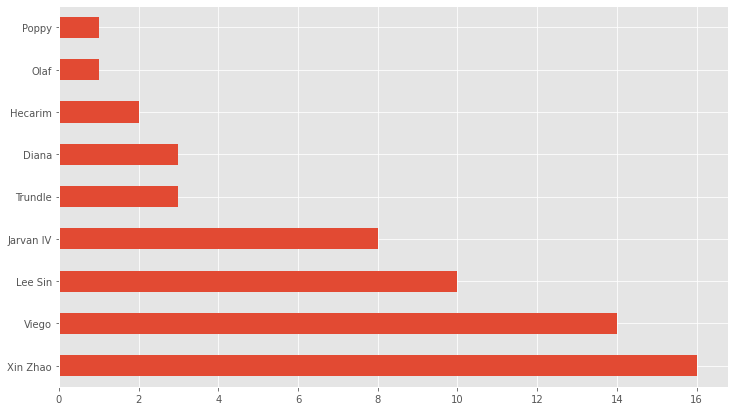

In [34]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

# Create an URL object
url = 'https://lol.fandom.com/wiki/LCS/2022_Season/Lock_In/Runes'

# Create object page
page = requests.get(url)

# Test response; 200 means server response
print(page)

# Obtain page's information
soup = BeautifulSoup(page.text, 'lxml')

# Grab table
table = soup.find("table", class_ = 'wikitable runedata hoverable-rows')

# Append headers to list
headers = []
for i in table.find_all('th'):
  temp = i.text
  headers.append(temp)

# Creating a dataframe
df = pd.DataFrame(columns = headers)

# Grabbing observations
for j in table.find_all('tr')[1:]:
 row_data = j.find_all('td')
 row = [i.text for i in row_data]
 length = len(df)
 df.loc[length] = row

# Seeing which junglers are the most popular
df['Champion'].loc[(df['Position'] == 'Jungle') & (df['V'] == '12.1')].value_counts().plot(kind = 'barh', figsize = (12,7))